## Student Performance Indicator


### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

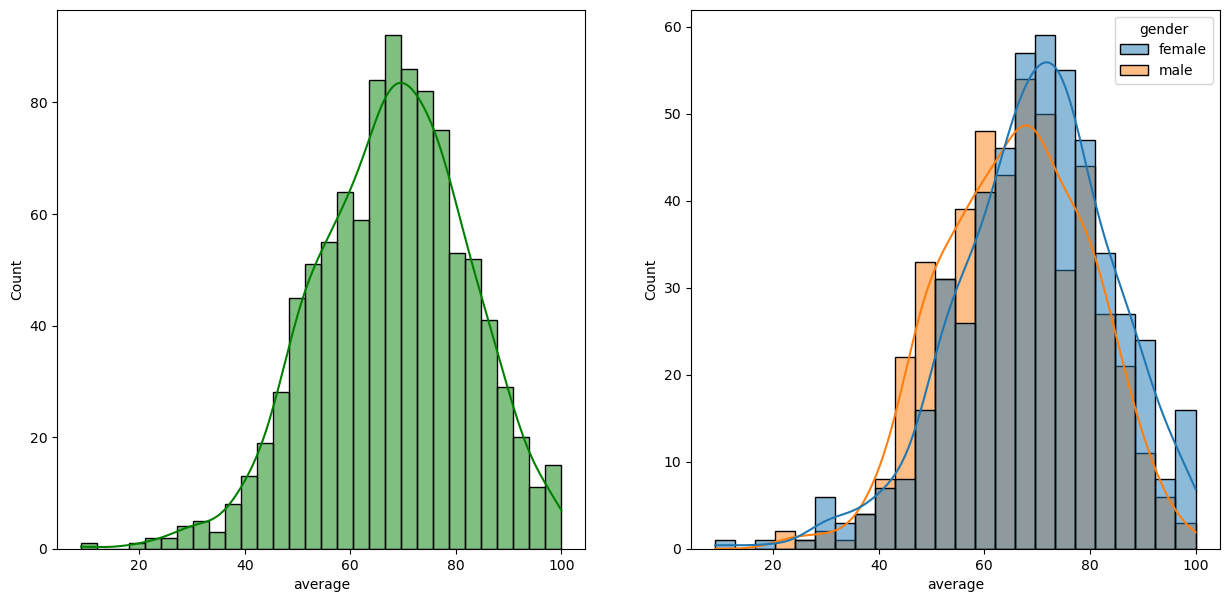

In [17]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


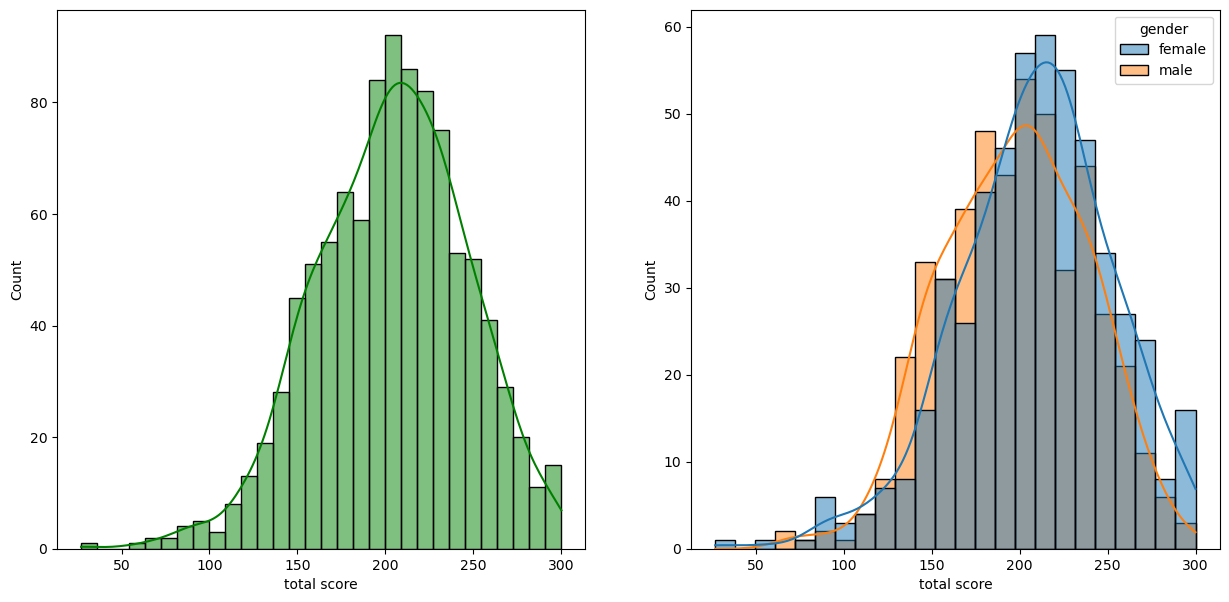

In [19]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

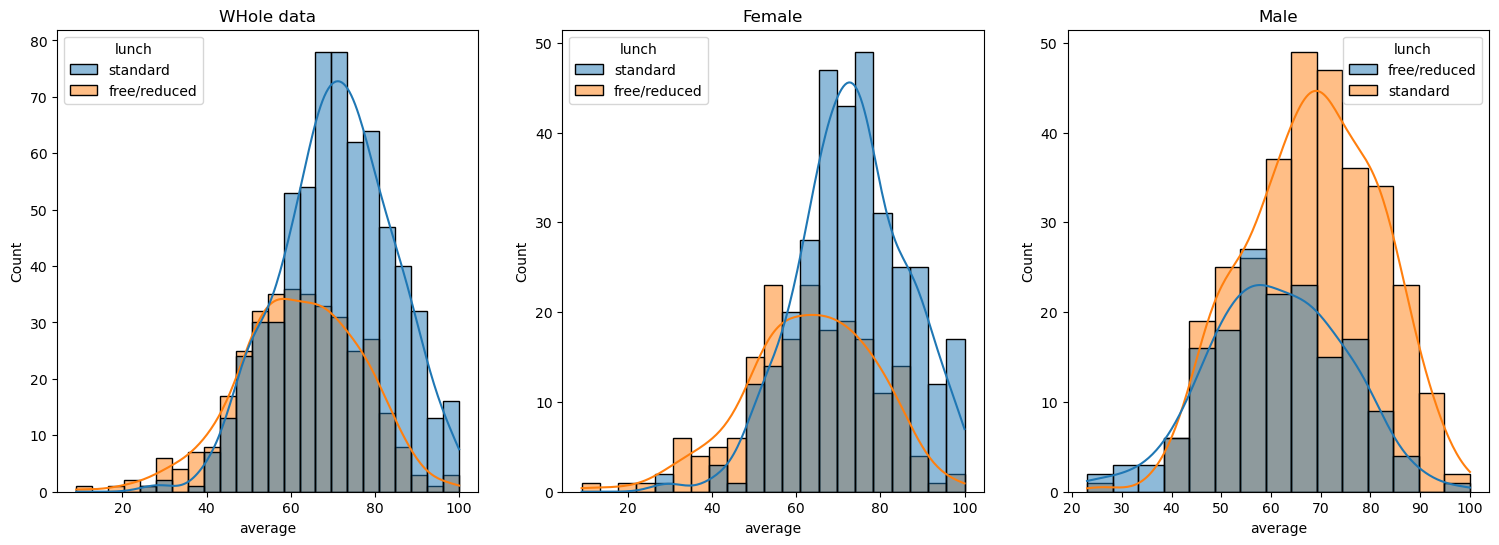

In [20]:
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.title('WHole data')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.title('Female')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.title('Male')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

KDE and HIST PLOT FOR AVEGRAGE OF TOTAL,MALE AND FEMALE WRT PARENT EDUCATION 
- No need for plt.legend() if hue= is used. 

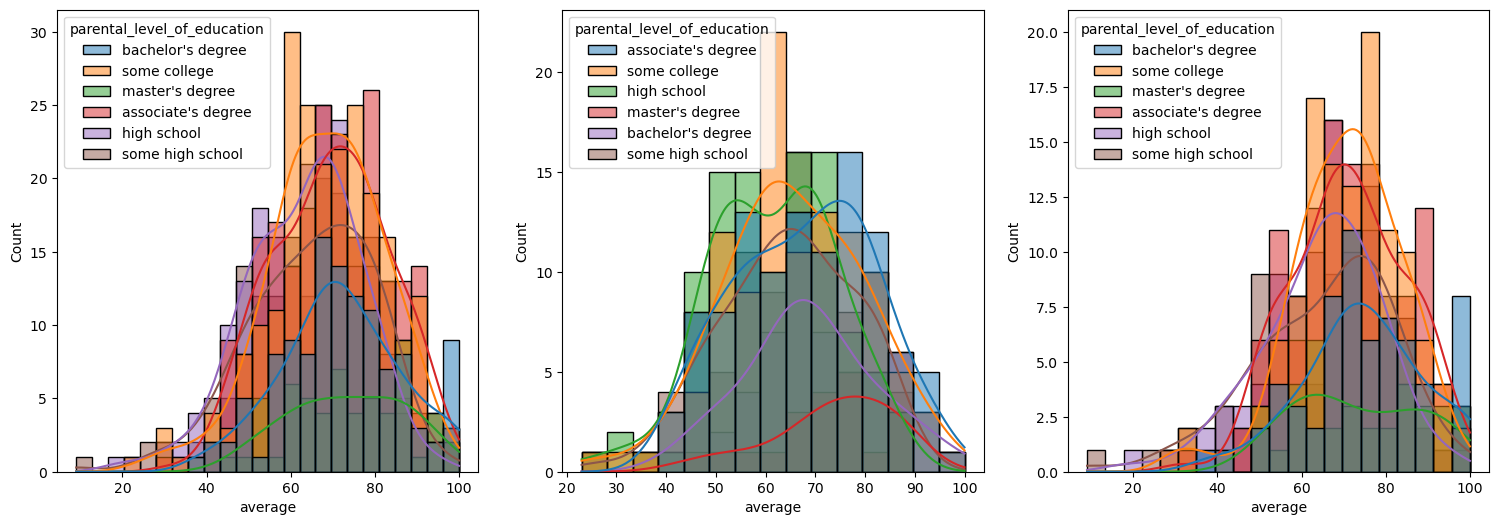

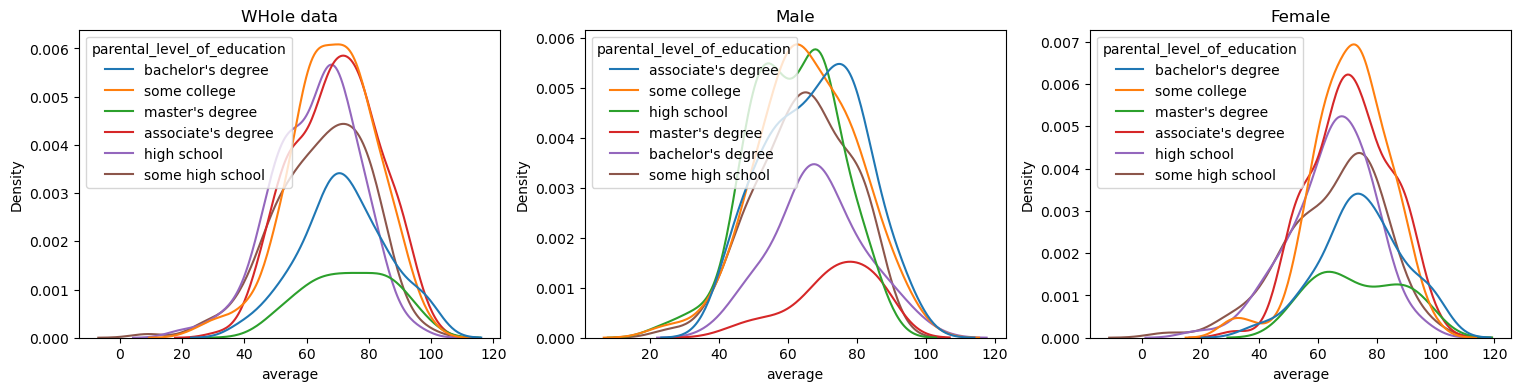

In [21]:

plt.figure(figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')


plt.figure(figsize=(25,4))
plt.subplot(141)
sns.kdeplot(data=df,x='average',hue='parental_level_of_education')
plt.title('WHole data')

plt.subplot(142)
sns.kdeplot(data=df[df.gender=='male'],x='average',hue='parental_level_of_education')
plt.title('Male')

plt.subplot(143)
sns.kdeplot(data=df[df.gender=='female'],x='average',hue='parental_level_of_education')
plt.title('Female')

plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

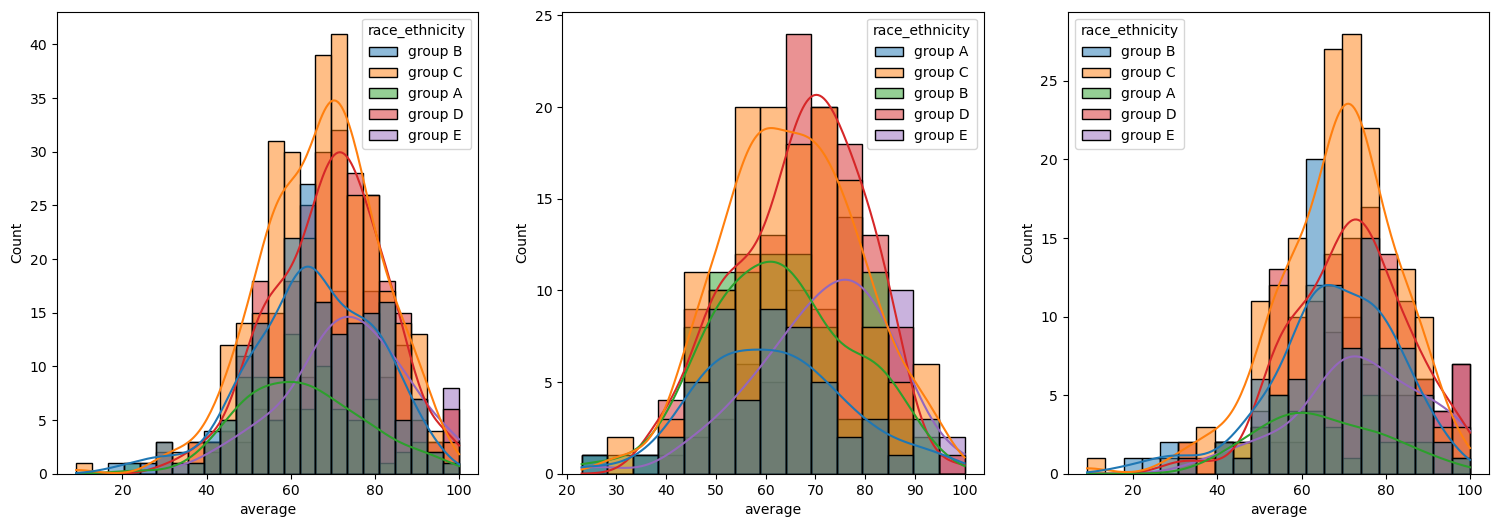

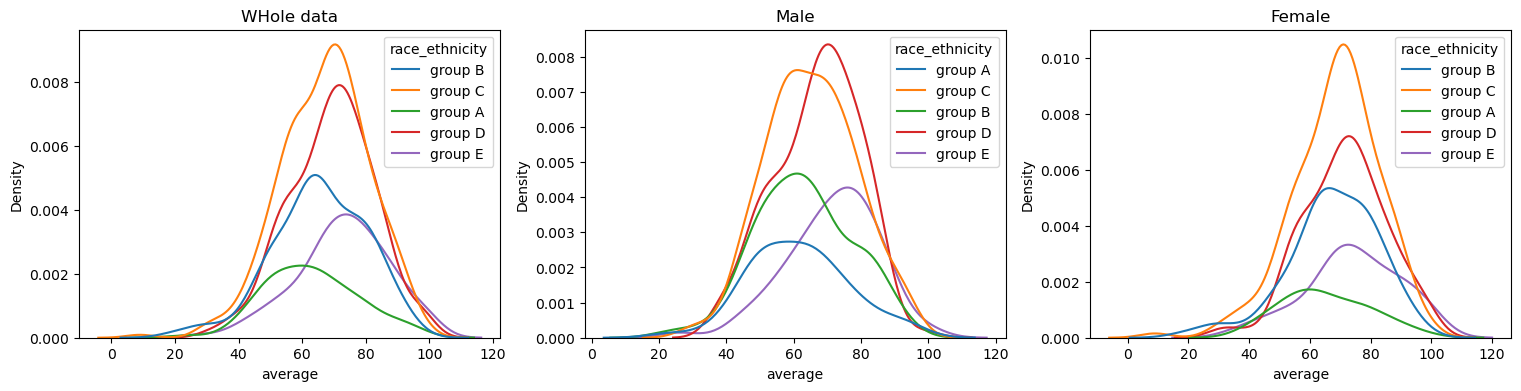

In [22]:

plt.figure(figsize=(25,6))

plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')

plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')

plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')


plt.figure(figsize=(25,4))

plt.subplot(141)
sns.kdeplot(data=df,x='average',hue='race_ethnicity')
plt.title('WHole data')

plt.subplot(142)
sns.kdeplot(data=df[df.gender=='male'],x='average',hue='race_ethnicity')
plt.title('Male')

plt.subplot(143)
sns.kdeplot(data=df[df.gender=='female'],x='average',hue='race_ethnicity')
plt.title('Female')

plt.show()




#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

- THIS PLOT TELL THAT ON Y AXIS WE HAVE NO.OF STUDENTS FOR GIVEN AVERAGE (X AXIS)

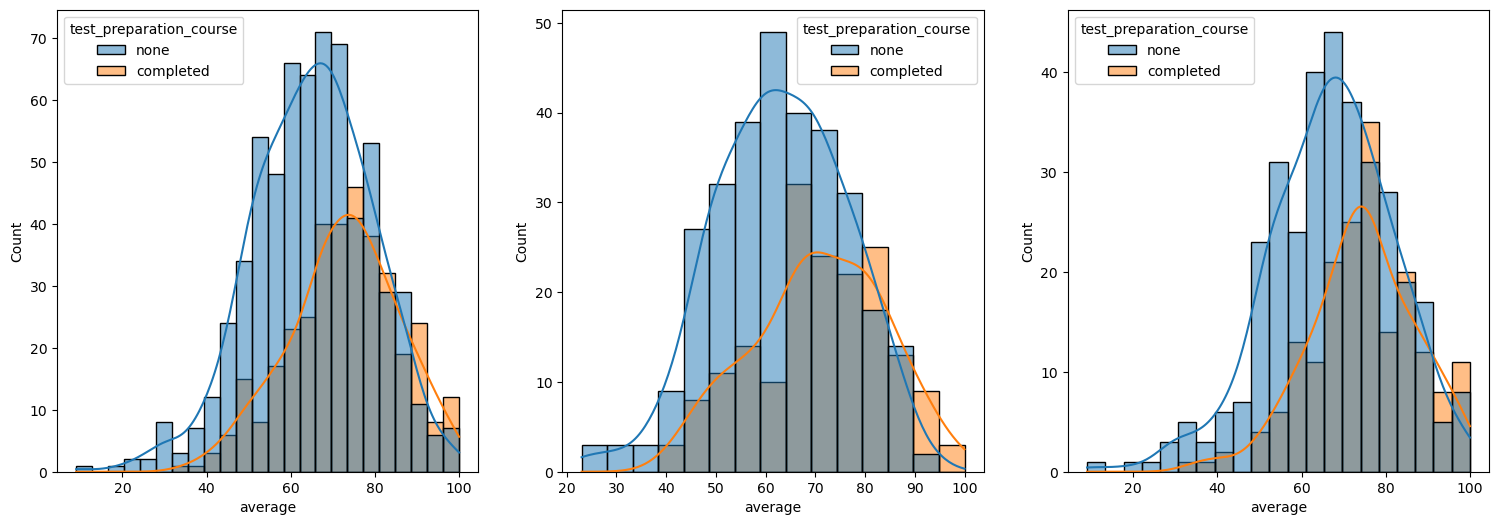

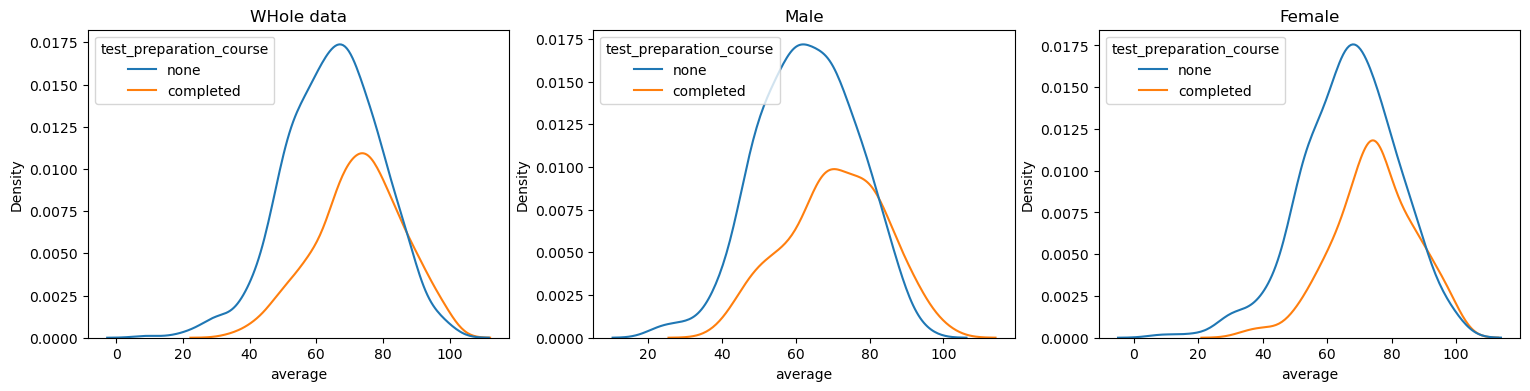

In [23]:
plt.figure(figsize=(25,6))

plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='test_preparation_course',)

plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='test_preparation_course')

plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='test_preparation_course')


plt.figure(figsize=(25,4))

plt.subplot(141)
sns.kdeplot(data=df,x='average',hue='test_preparation_course')
plt.title('WHole data')

plt.subplot(142)
sns.kdeplot(data=df[df.gender=='male'],x='average',hue='test_preparation_course')
plt.title('Male')

plt.subplot(143)
sns.kdeplot(data=df[df.gender=='female'],x='average',hue='test_preparation_course')
plt.title('Female')

plt.show()

##### Insights

Irrespective of the gender
- There are more number of students who have NOT completed the test prep.
- The overall average score of the students who have COMPLETED the test prep is better

#### 4.2 Maximumum score of students in all three subjects

In [24]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


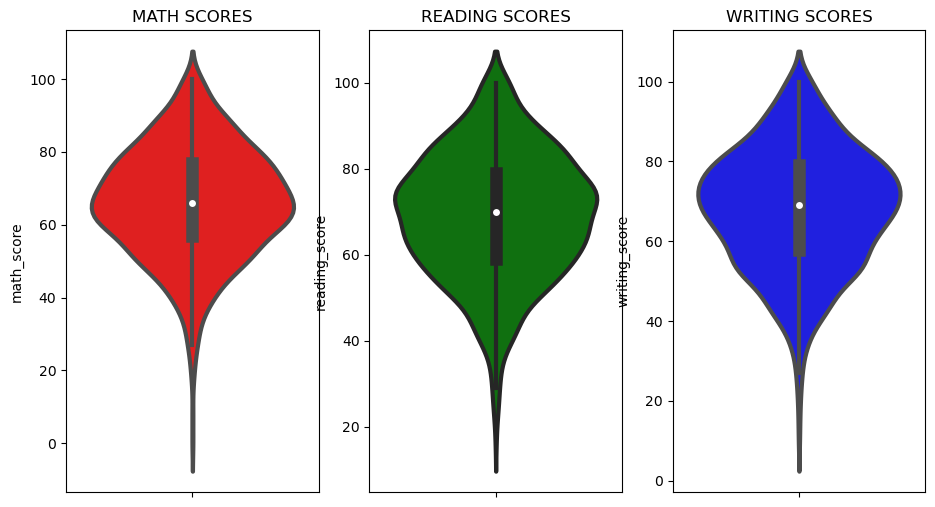

In [25]:

plt.figure(figsize=(15,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using  ( One way to do as coded by me)

In [26]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [27]:
df.columns[0]

'gender'

In [28]:
df[df.columns[0]].value_counts()


female    518
male      482
Name: gender, dtype: int64

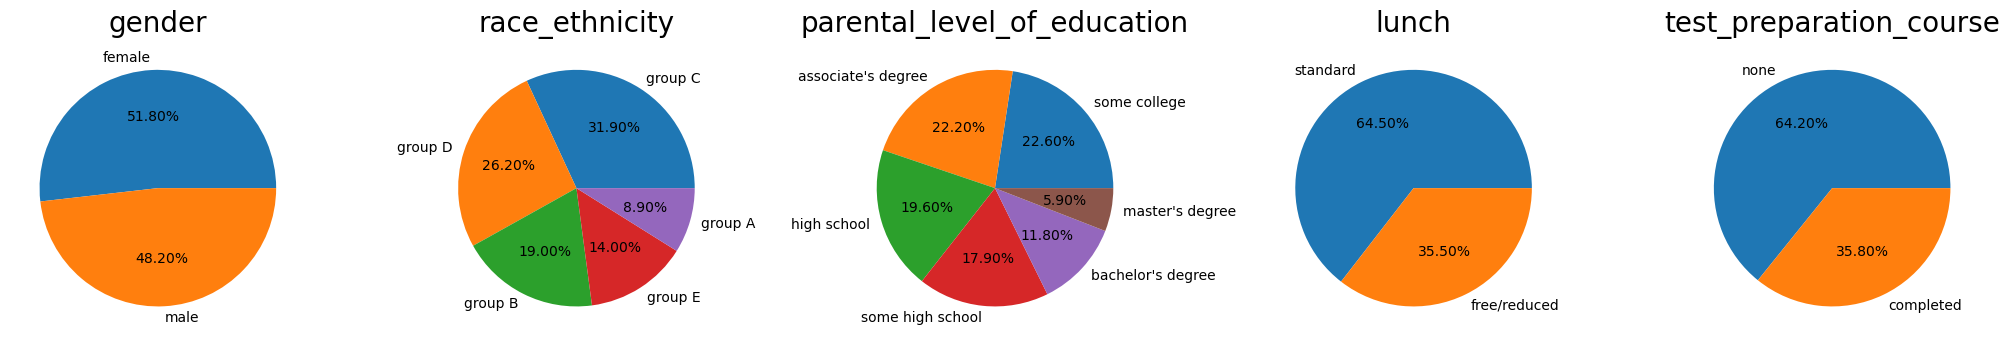

In [29]:
plt.figure(figsize= (20,4))


for i in range(len(df.columns)-5):
    # print(i+1)
    # print(df.columns[i])
    plt.subplot(1,len(df.columns)-5,i+1)
    plt.pie(df[df.columns[i]].value_counts(),labels=df[df.columns[i]].value_counts().index,autopct= '%1.2f%%')
    plt.title(df.columns[i],fontsize=20)
    
plt.tight_layout(w_pad=2,h_pad=8)
plt.grid()



Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 FEATURE WISE VISUALIZATION

#### 4.4.1 Gender Feature
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

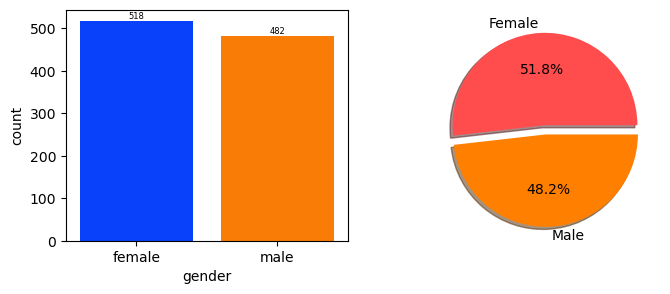

In [30]:
f,ax=plt.subplots(1,2,figsize=(8,3))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=6)
    
plt.pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index.str.capitalize(),explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (51.8%) and male students are 482 (48.2%) 

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

#### SIMPLE WAY TO PLOT in NORMAL AND INVERTED WAYS
- USE GROUPED_DATAFRAME.PLOT() TO GET INDEX VALUES ON X-AXIS AND COLUMN VALUES ON Y, WHERE HUE WOULD BE COLUMN NAMES

- Use Grouped_Dataframe.TRANSPOSE().plot() to interchange index and columns names.

In [31]:
gender_group = df.groupby('gender').mean().round(decimals=3)
gender_group1 = gender_group.drop(['total score','average'],axis=1)

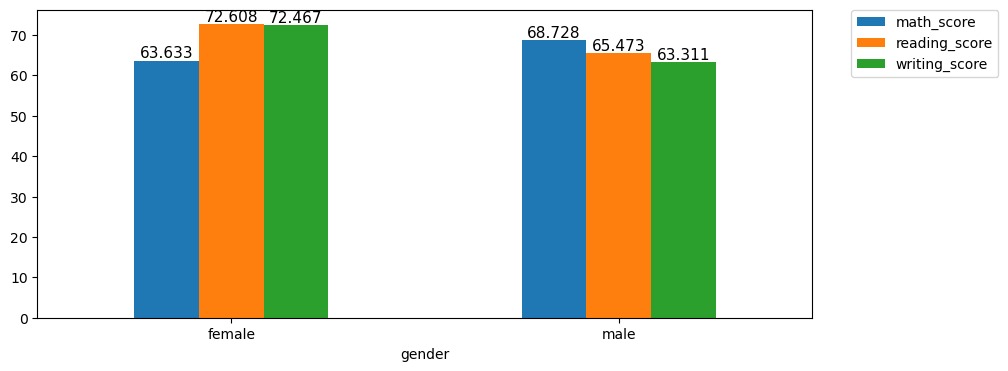

In [32]:
ax = gender_group1.plot(kind='bar',figsize=(10,4))
for container in ax.containers:
    ax.bar_label(container,fontsize=11)

plt.xticks(rotation='horizontal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#####  USING TRANSPOSE ON GROUPED DATA

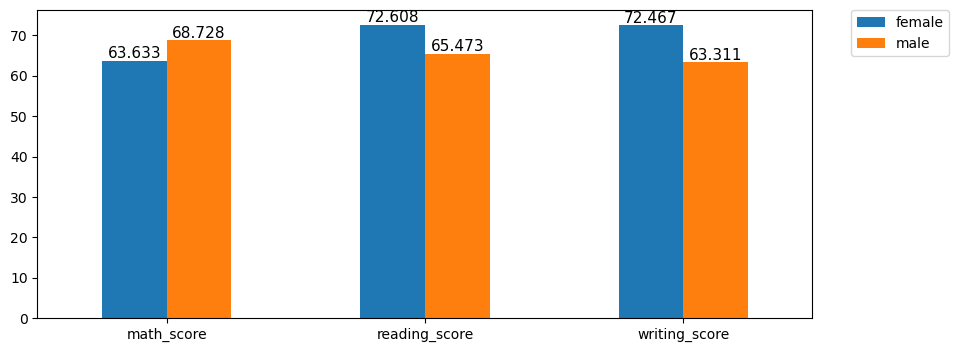

In [33]:
ax = gender_group1.transpose().plot(kind='bar',figsize=(10,4))
for container in ax.containers:
    ax.bar_label(container,fontsize=11)

plt.xticks(rotation='horizontal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

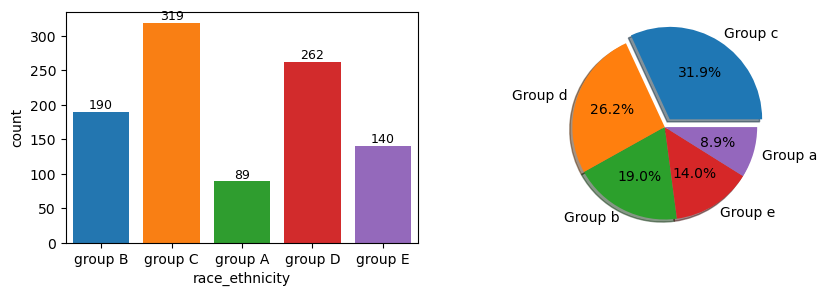

In [34]:
f,ax=plt.subplots(1,2,figsize=(10,3))
sns.countplot(x=df['race_ethnicity'],data=df,ax=ax[0],saturation=0.95)


for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=9)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index.str.capitalize(),explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [35]:
group_date_race = df.groupby('race_ethnicity').mean().round(decimals=2)

group_date_race.rename(index={'group A':'group_A','group B':'group_B','group C':'group_C','group D':'group_D','group E':'group_E'},inplace=True) #To remove space between group and A,B,...E
group_date_race

,math_score,reading_score,writing_score,total score,average
race_ethnicity,,,,,
group_A,61.63,64.67,62.67,188.98,62.99
group_B,63.45,67.35,65.60,196.41,65.47
group_C,64.46,69.10,67.83,201.39,67.13
group_D,67.36,70.03,70.15,207.54,69.18
group_E,73.82,73.03,71.41,218.26,72.75


In [36]:
group_date_race1 = group_date_race.drop(['total score','average'],axis=1)

#### MY OWN WAY ( SIMILAR TO GENDER ONE) TOO MUCH CODE !!!

In [37]:
# TO ASSIGN EMPTY LISTS TO ALL THE GROUPS SO THAT ALL THE AVREAGE VALUES WRT GROUPS CAN BE STORED IN A LIST 
group_A,group_B,group_C,group_D,group_E = [[] for i in range(len(group_date_race.index))]  

type(group_A)

list

In [38]:
for i in group_date_race1:
    group_A.append(group_date_race1[i][0])
    group_B.append(group_date_race1[i][1])
    group_C.append(group_date_race1[i][2])
    group_D.append(group_date_race1[i][3])
    group_E.append(group_date_race1[i][4])


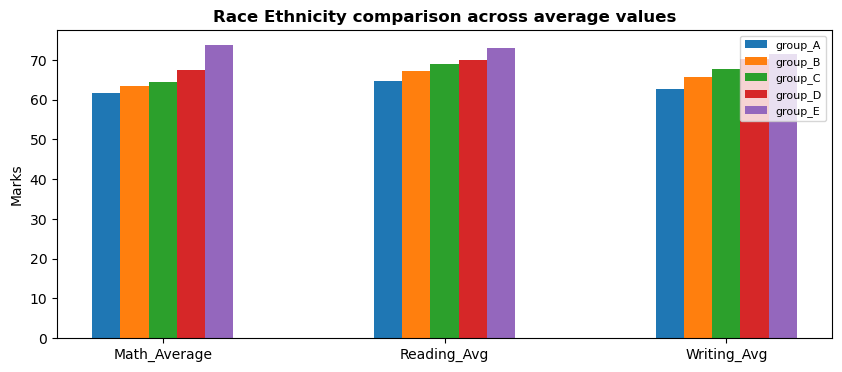

In [39]:
plt.figure(figsize=(10, 4))

X = ['Math_Average','Reading_Avg','Writing_Avg']

X_axis = np.arange(len(X))

width = 0.05 # DONE TO ADJUST SPACING ON X AXIS SINCE THERE ARE MANY CATEGORIES


'''
x_AXIS+WIDTH IS DONE TO SET UP GROUP WISE AVERAGE ON THE AXIS AT APPROPRIATE LENGTHS
'''

plt.bar(X_axis+width ,group_A, 0.1, label = 'group_A')


plt.bar(X_axis+width*3, group_B, 0.1, label = 'group_B')


plt.bar(X_axis+width*5 , group_C, 0.1, label = 'group_C')


plt.bar(X_axis+width*7 , group_D, 0.1, label = 'group_D')


plt.bar(X_axis+width*9, group_E, 0.1, label = 'group_E')



plt.xticks(X_axis+width*5, X)
plt.ylabel("Marks")
plt.title("Race Ethnicity comparison across average values", fontweight='bold')
plt.legend(fontsize=8)
plt.show()

#### SIMPLE WAY TO PLOT in NORMAL AND INVERTED WAYS


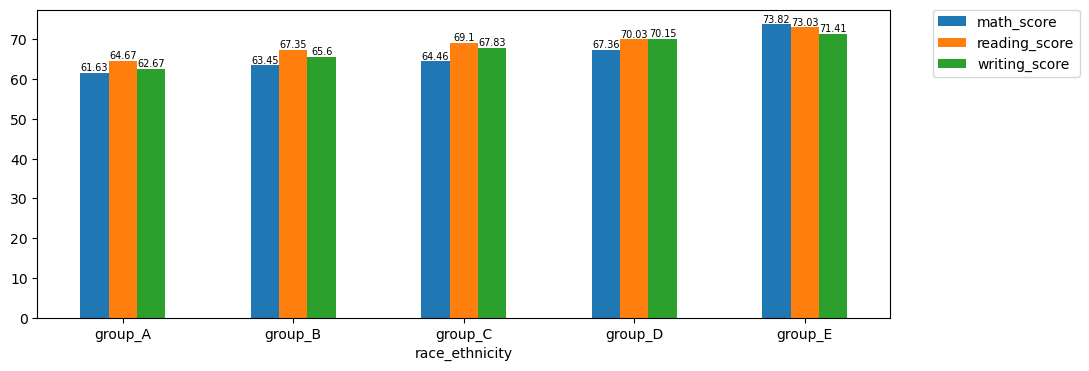

In [40]:
ax = group_date_race1.plot(kind='bar',figsize=(11,4))
for container in ax.containers:
    ax.bar_label(container,fontsize=7)
    
plt.xticks(rotation='horizontal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#####  USING TRANSPOSE ON GROUPED DATA

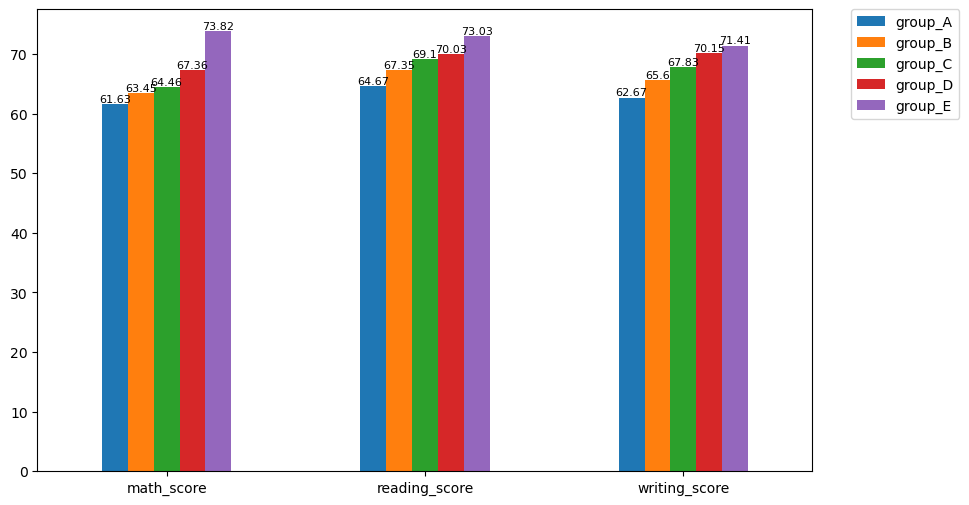

In [41]:

ax = group_date_race1.transpose().plot(kind='bar',figsize=(10,6))
for container in ax.containers:
    ax.bar_label(container,fontsize=8)
    
plt.xticks(rotation='horizontal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

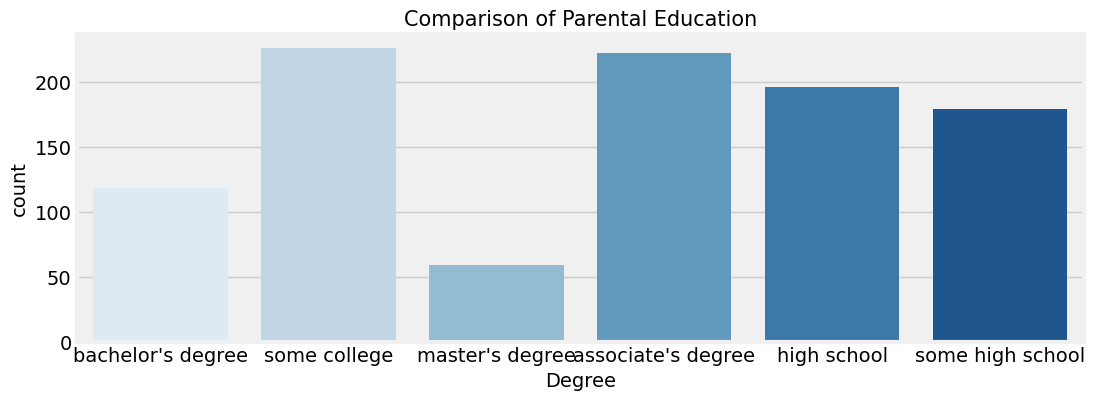

In [42]:
# plt.rcParams['figure.figsize'] = (15, 6)
plt.figure(figsize=(13,4))
plt.style.use('fivethirtyeight')
sns.countplot(data=df,x=df['parental_level_of_education'],palette='Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 15)
plt.xlabel('Degree')

plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

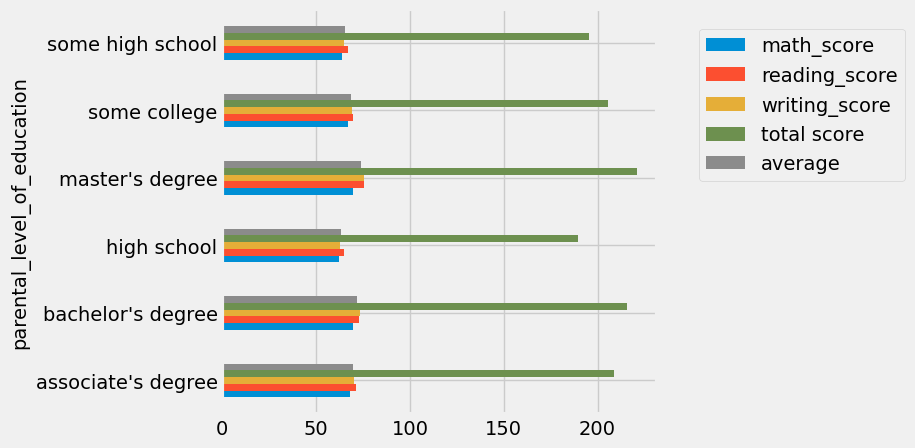

In [43]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

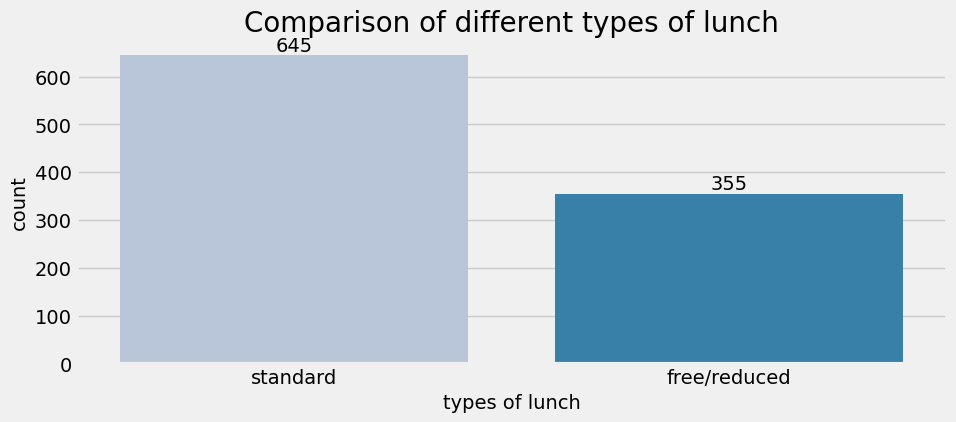

In [44]:
# plt.rcParams['figure.figsize'] = (15, 9)
plt.figure(figsize=(10,4))

a = sns.countplot(data=df,x='lunch', palette = 'PuBu',)
for container in a.containers:
    a.bar_label(container,color='black')


plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- No. of students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [45]:
group_lunch = df.groupby('lunch').mean().round(decimals=3).drop(['average'],axis=1)
group_lunch

,math_score,reading_score,writing_score,total score
lunch,,,,
free/reduced,58.921,64.654,63.023,186.597
standard,70.034,71.654,70.823,212.512


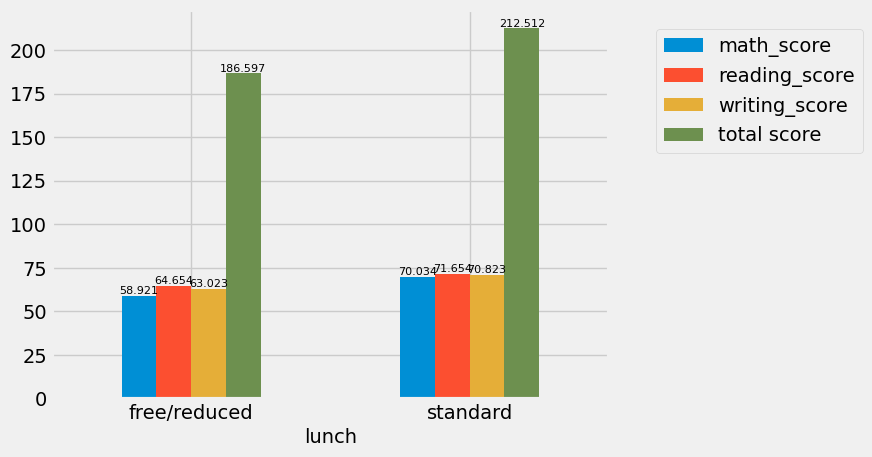

In [46]:
a = group_lunch.plot(kind='bar')

for container in a.containers:
    a.bar_label(container,fontsize=8)

plt.xticks(rotation='horizontal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)
plt.show()

#####  USING TRANSPOSE ON GROUPED DATA

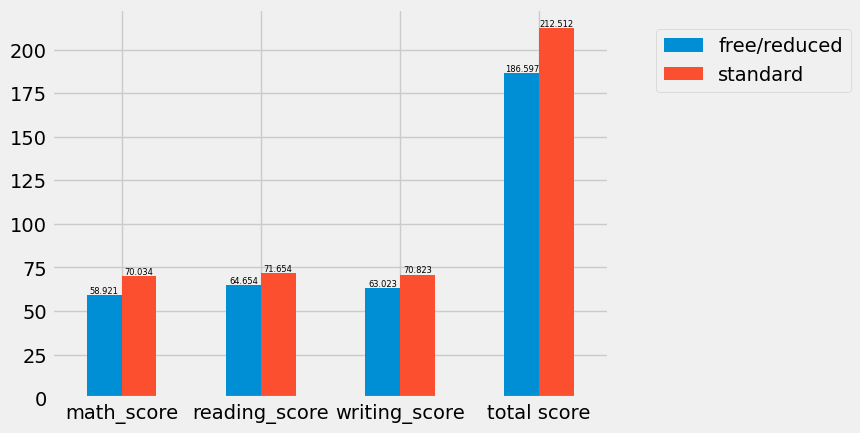

In [47]:
a = group_lunch.transpose().plot(kind='bar')

for container in a.containers:
    a.bar_label(container,fontsize=6)

plt.xticks(rotation='horizontal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)
plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### UNIVARIATE ANALYSIS

In [48]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


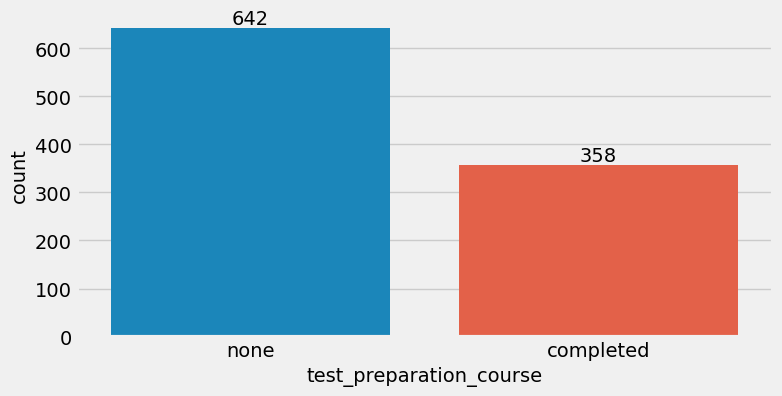

In [49]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df,x='test_preparation_course')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

####  Insights 
- NO.OF STUDENTS WHO HAVE NOT COMPLETED ANY TEST PREP COURSE IS WAY MORE THAN THE ONES WHO COMPLETED 

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

In [50]:
group_test_prep = df.groupby('test_preparation_course').mean().round(decimals=2).drop(['average'],axis=1)
group_test_prep

,math_score,reading_score,writing_score,total score
test_preparation_course,,,,
completed,69.70,73.89,74.42,218.01
none,64.08,66.53,64.50,195.12


### Simple way using grouped_feature.DataFrame.plot

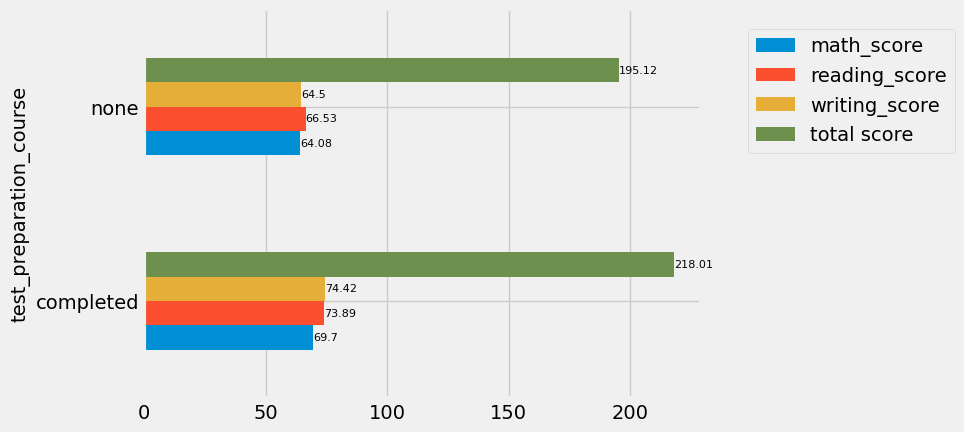

In [51]:
ax = group_test_prep.plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container,fontsize=8)

plt.xticks(rotation='horizontal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)
plt.show()

#### Using transpose

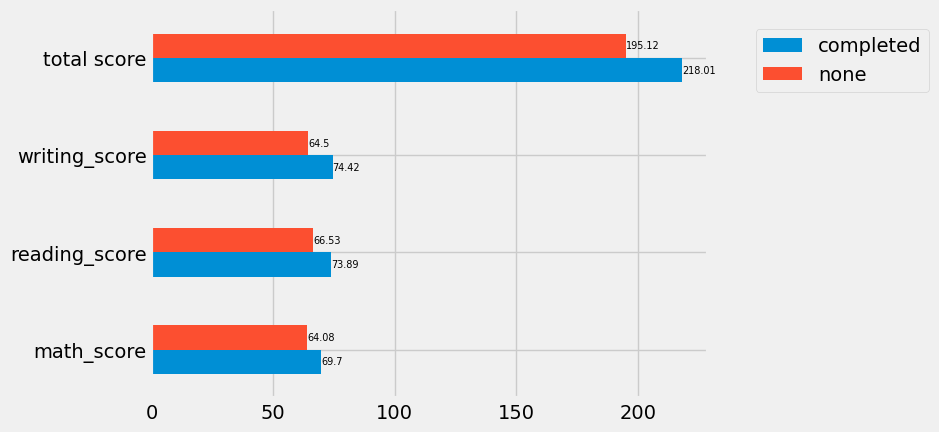

In [52]:
ax = group_test_prep.transpose().plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container,fontsize=7)

plt.xticks(rotation='horizontal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

- In sns.boxplot(), x axis should always have numeric values, categorical is not allowed

In [53]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


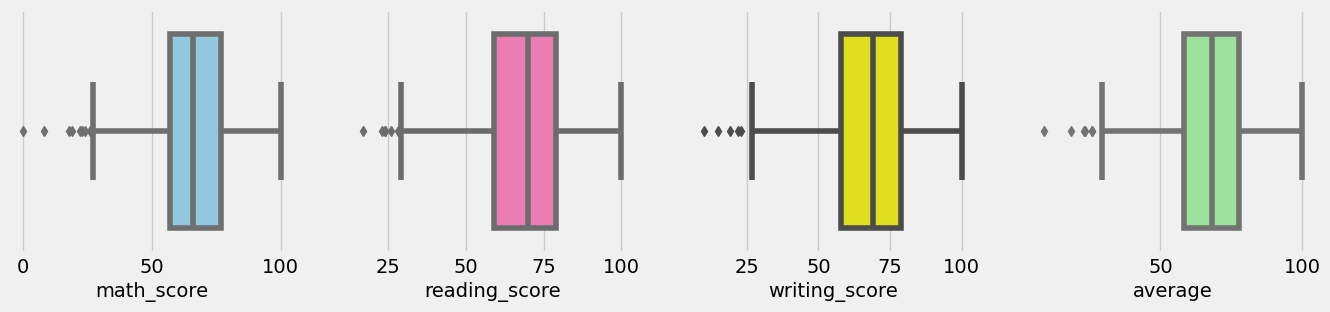

In [54]:
plt.subplots(1,4,figsize=(15,3))
plt.subplot(141)
sns.boxplot(x = df['math_score'],color='skyblue')

plt.subplot(142)
sns.boxplot(x=df['reading_score'],color='hotpink')

plt.subplot(143)
sns.boxplot(x=df['writing_score'],color='yellow')

plt.subplot(144)
sns.boxplot(x=df['average'],color='lightgreen')
plt.show()

#### Insights

As we can see there are few outliers

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

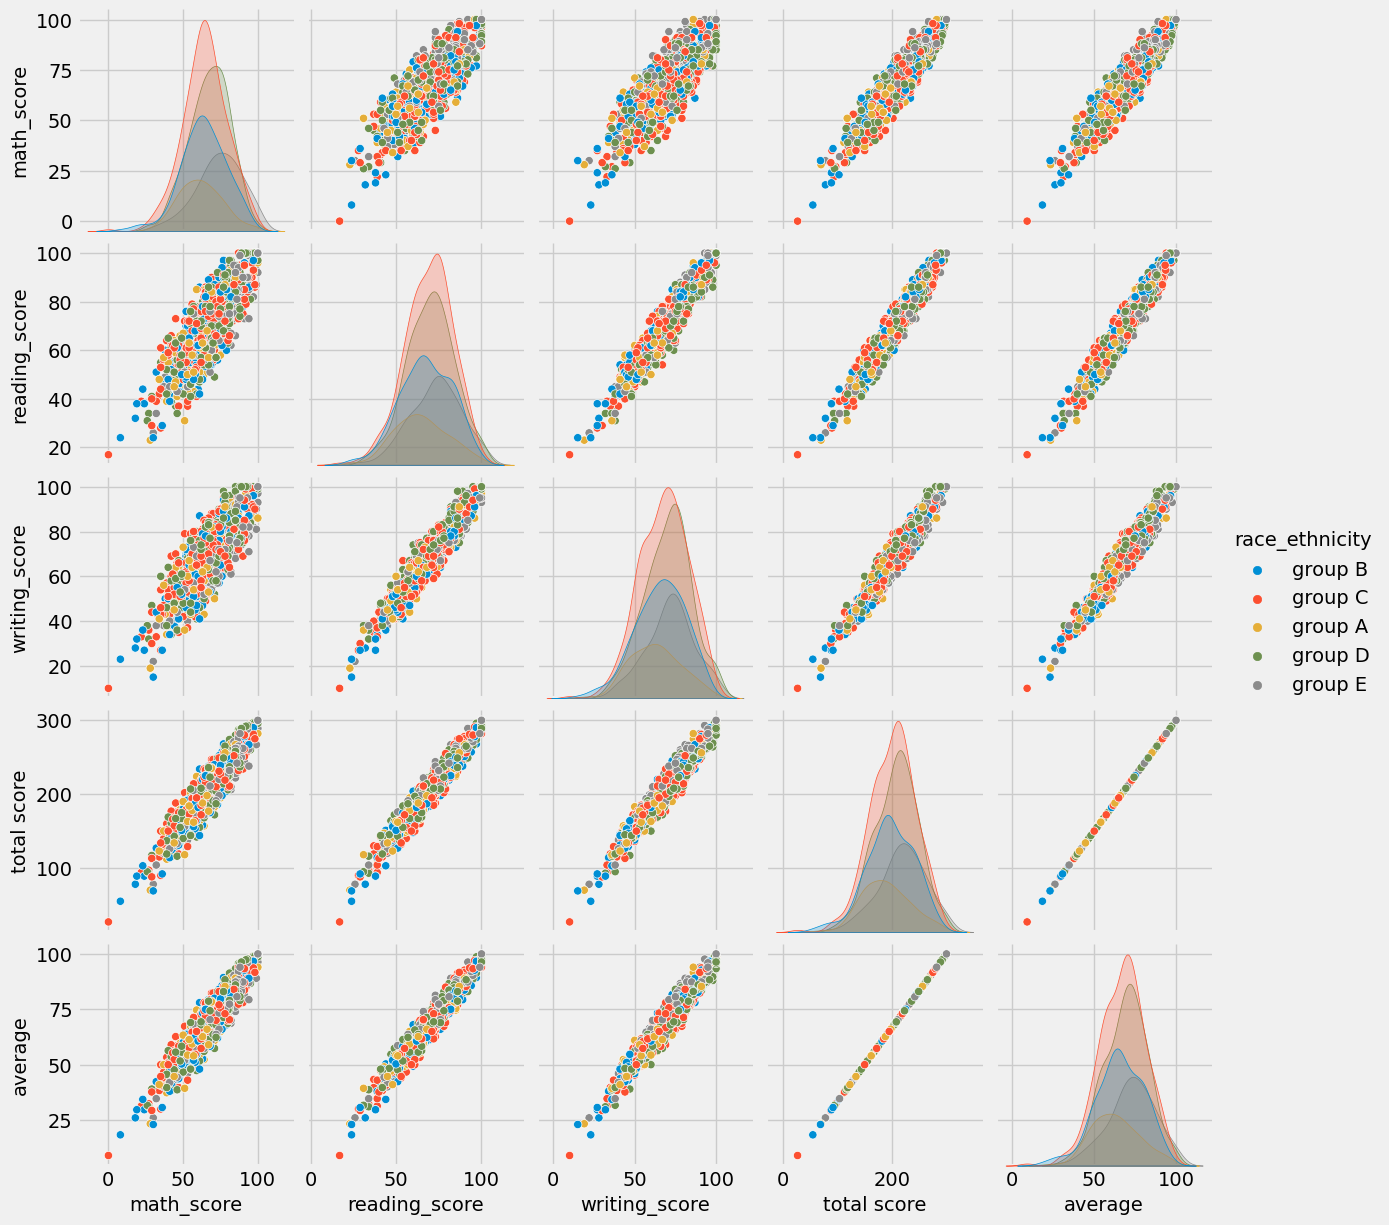

In [55]:
sns.pairplot(df,hue ='race_ethnicity')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.